# Python para procesamiento de imágenes

## Beepy 2da edicion

### Cargar y mostrar imagenes

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import data

In [11]:
# Para una imagen que tengamos guardada en nuestra computadora:
img_frutas = mpimg.imread('frutas.jpg')
# Para usar alguna de las imagenes incluidas en scikit-image:
img_gato = data.chelsea()

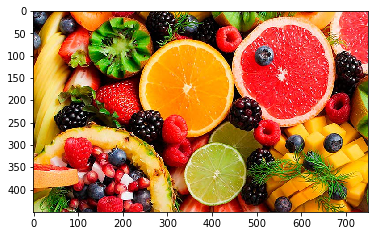

In [12]:
plt.imshow(img_frutas)

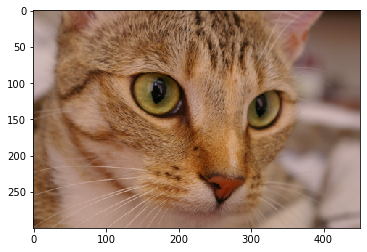

In [13]:
plt.imshow(img_gato)

In [14]:
# altura y base de la imagen en pixeles, mas tres canales de color
img_gato.shape

(300, 451, 3)

In [15]:
img_frutas.shape

(450, 750, 3)

### Ejercicio 1.

Usando **matrix slicing**, muestra solo una zona tamano 50x50 de ambas imagenes.

In [16]:
# Haz tu slicing aqui
zona_frutas = img_frutas[:, :]
zona_gato = img_gato[:, :]

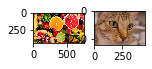

In [17]:
# Corre esta celda para ver el resultado
fig = plt.figure(figsize = (2, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(zona_frutas)
fig.add_subplot(1, 2, 2)
plt.imshow(zona_gato)

### Manipular los canales de color

In [18]:
# Veamos el color de un solo pixel
print(img_frutas[200][300])

[255 138   0]


In [21]:
copia_frutas = img_frutas.copy()

In [22]:
# Codigo sucio
for fila in copia_frutas:
    for pixel in fila:
        promedio = np.mean(pixel)
        pixel[0] = promedio
        pixel[1] = promedio
        pixel[2] = promedio

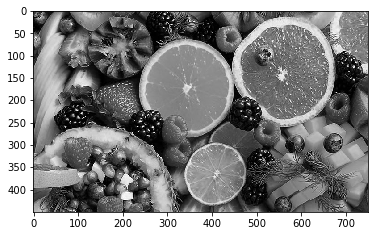

In [23]:
plt.imshow(copia_frutas)

In [25]:
# Modo pythonista
img_frutas_bn = np.mean(img_frutas, -1)
#from skimage.color import rgb2gray
#img_frutas_bn = rgb2gray(img_frutas)

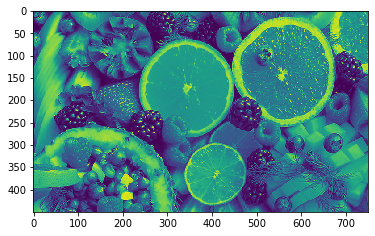

In [26]:
plt.imshow(img_frutas_bn)

Por que pasa esto? Porque las imagenes a blanco y negro solo necesitan un numero, la intensidad del gris, en lugar de tres. Matplotlib muestra esta intensidad en su mapa de colores default, que es el famoso Viridis. Hay que indicarle el mapa a escala de grises.

La referencia de los mapas de colores de Matplotlib se encuentra [aqui](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### Ejercicio 2.

Modifica el ciclo anterior para aumentar la intensidad de los verdes.

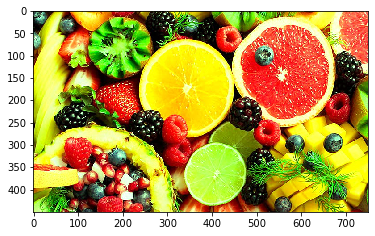

In [28]:
copia_frutas2 = img_frutas.copy()

for fila in copia_frutas2:
    for pixel in fila:
        # Modifica aquí:
        promedio = np.mean(pixel)
        pixel[0] = promedio
        pixel[1] = promedio
        pixel[2] = promedio
        
plt.imshow(copia_frutas2)

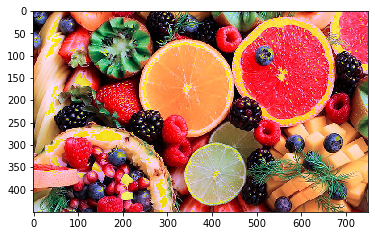

In [32]:
# Modo pythonista
copia_frutas3 = img_frutas.copy()

copia_frutas3[:, :, 2] += copia_frutas3[:, :, 1] // 2
        
plt.imshow(copia_frutas3)

## Filtros

### Ejercicio 3. (opcional)

¿Qué forma tendría un kernel que calculara el promedio de los vecinos? ¿Qué efecto tendría en la imagen?

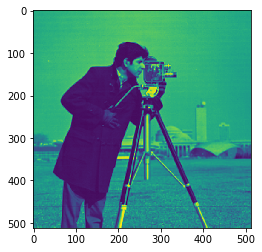

In [33]:
from skimage.morphology import disk
from skimage.filters import median
img = data.camera()
plt.imshow(img)
med = median(img, disk(5))

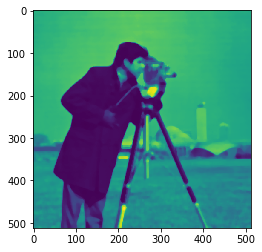

In [34]:
plt.imshow(med)